In [2]:
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt


In [3]:
intensityDf = pd.read_csv("20250716_173946_invivo_ABPP_kinases_XO44_Hek293_HeLa_Report.csv")
kinaseDf = pd.read_csv("updated_kinase_list.csv")
# intensityDf
# kinaseDf

In [4]:
# kinaseDf.columns
mergedDf = pd.merge(kinaseDf, intensityDf, left_on="HGNC ", right_on="PG.Genes", how="inner")
mergedDf


,HGNC,Entrez Gene ID,Ensembl Gene IDs,Uniprot,Alternative Name,Kinbase classification,Kinase Classification,PG.Pvalue,PG.ProteinLabel,PG.ProteinGroups,...,[3] Hek293_control_invivo_3.raw.PG.Quantity,[4] Hek293_XO44_invivo_1.raw.PG.Quantity,[5] Hek293_XO44_invivo_2.raw.PG.Quantity,[6] Hek293_XO44_invivo_3.raw.PG.Quantity,[7] HeLa_control_invivo_1.raw.PG.Quantity,[8] HeLa_control_invivo_2.raw.PG.Quantity,[9] HeLa_control_invivo_3.raw.PG.Quantity,[10] HeLa_XO44_invivo_1.raw.PG.Quantity,[11] HeLa_XO44_invivo_2.raw.PG.Quantity,[12] HeLa_XO44_invivo_3.raw.PG.Quantity
0,AAK1,22848,ENSG00000115977,NaN,NaN,Other : NAK : BIKE,Other,1.513330e-04,AAK1_HUMAN,Q2M2I8,...,39.805748,868.945312,719.769104,824.146240,34.576149,22.860731,21.737524,715.630005,716.379822,868.852051
1,ABL1,25,ENSG00000097007,NaN,NaN,TK : Abl,TK,1.076987e-05,ABL1_HUMAN,P00519,...,34.820557,3502.917969,2665.347900,3109.280273,63.033894,17.377529,21.898422,2306.119141,2124.788330,3245.169922
2,ABL2,27,ENSG00000143322,NaN,NaN,TK : Abl,TK,6.082301e-07,ABL2_HUMAN,P42684,...,51.126205,7730.421875,6885.491699,7011.898438,101.801468,57.398876,74.039062,4347.907227,4208.270508,5555.064941
3,ACVR1,90,ENSG00000115170,NaN,NaN,TKL : STKR : STKR1,TKL,1.235239e-04,ACVR1_HUMAN,Q04771,...,112.892838,4278.835938,3536.387695,4024.496338,55.203896,34.384048,89.582047,1401.100952,1048.935425,2135.180420
4,ACVR1B,91,ENSG00000135503,NaN,NaN,TKL : STKR : STKR1,TKL,5.900033e-03,ACV1B_HUMAN,P36896,...,21.167953,2425.750000,2262.575195,3081.423096,40.012814,16.445568,48.914673,498.568329,582.790466,814.860718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,FAM20B,9917,ENSG00000116199,NaN,NaN,PKL : FJ,PKL,1.161802e-03,XYLK_HUMAN,O75063,...,49.377003,426.221466,304.096069,505.990601,31.592026,31.443001,22.008673,372.765717,310.553009,492.194153
363,FASTKD1,79675,ENSG00000138399,NaN,NaN,not in kinbase,not in kinbase,3.930124e-04,FAKD1_HUMAN,Q53R41,...,16.523146,535.481323,450.941864,543.104187,26.290852,36.269817,49.265476,599.410583,578.244568,821.828918
364,FASTKD2,22868,ENSG00000118246,NaN,NaN,not in kinbase,not in kinbase,2.453903e-05,FAKD2_HUMAN,Q9NYY8,...,70.848938,2616.432617,2114.037598,2552.085693,325.128326,231.853149,297.804932,6198.708496,6750.619629,8791.963867
365,FASTKD5,60493,ENSG00000215251,NaN,NaN,not in kinbase,not in kinbase,2.368294e-05,FAKD5_HUMAN,Q7L8L6,...,103.971619,2105.891113,1781.678711,2081.756836,69.999176,72.867477,59.899357,1260.710938,1030.181152,1474.197632


In [5]:
mergedDf.columns

Index(['HGNC ', 'Entrez Gene ID', 'Ensembl Gene IDs', 'Uniprot',
       'Alternative Name', 'Kinbase classification', 'Kinase Classification',
       'PG.Pvalue', 'PG.ProteinLabel', 'PG.ProteinGroups', 'PG.Genes',
       '[1] Hek293_control_invivo_1.raw.PG.Quantity',
       '[2] Hek293_control_invivo_2.raw.PG.Quantity',
       '[3] Hek293_control_invivo_3.raw.PG.Quantity',
       '[4] Hek293_XO44_invivo_1.raw.PG.Quantity',
       '[5] Hek293_XO44_invivo_2.raw.PG.Quantity',
       '[6] Hek293_XO44_invivo_3.raw.PG.Quantity',
       '[7] HeLa_control_invivo_1.raw.PG.Quantity',
       '[8] HeLa_control_invivo_2.raw.PG.Quantity',
       '[9] HeLa_control_invivo_3.raw.PG.Quantity',
       '[10] HeLa_XO44_invivo_1.raw.PG.Quantity',
       '[11] HeLa_XO44_invivo_2.raw.PG.Quantity',
       '[12] HeLa_XO44_invivo_3.raw.PG.Quantity'],
      dtype='object')

In [6]:
mergedDf['average_hek293_X044_invivo'] = mergedDf[['[4] Hek293_XO44_invivo_1.raw.PG.Quantity','[5] Hek293_XO44_invivo_2.raw.PG.Quantity','[6] Hek293_XO44_invivo_3.raw.PG.Quantity']].mean(axis=1)
mergedDf['average_hela_X044_invivo'] = mergedDf[['[10] HeLa_XO44_invivo_1.raw.PG.Quantity', '[11] HeLa_XO44_invivo_2.raw.PG.Quantity', '[12] HeLa_XO44_invivo_3.raw.PG.Quantity']].mean(axis=1)

In [10]:
mergedDf = mergedDf[['HGNC ', "Kinase Classification", "PG.ProteinGroups",        '[4] Hek293_XO44_invivo_1.raw.PG.Quantity',
       '[5] Hek293_XO44_invivo_2.raw.PG.Quantity',
       '[6] Hek293_XO44_invivo_3.raw.PG.Quantity',       '[10] HeLa_XO44_invivo_1.raw.PG.Quantity',
       '[11] HeLa_XO44_invivo_2.raw.PG.Quantity',
       '[12] HeLa_XO44_invivo_3.raw.PG.Quantity', 'average_hek293_X044_invivo',
       'average_hela_X044_invivo']]
# mergedDf.to_csv("intensities.csv", index=False)
mergedDf

,HGNC,Kinase Classification,PG.ProteinGroups,[4] Hek293_XO44_invivo_1.raw.PG.Quantity,[5] Hek293_XO44_invivo_2.raw.PG.Quantity,[6] Hek293_XO44_invivo_3.raw.PG.Quantity,[10] HeLa_XO44_invivo_1.raw.PG.Quantity,[11] HeLa_XO44_invivo_2.raw.PG.Quantity,[12] HeLa_XO44_invivo_3.raw.PG.Quantity,average_hek293_X044_invivo,average_hela_X044_invivo
0,AAK1,Other,Q2M2I8,868.945312,719.769104,824.146240,715.630005,716.379822,868.852051,804.286886,766.953959
1,ABL1,TK,P00519,3502.917969,2665.347900,3109.280273,2306.119141,2124.788330,3245.169922,3092.515381,2558.692464
2,ABL2,TK,P42684,7730.421875,6885.491699,7011.898438,4347.907227,4208.270508,5555.064941,7209.270671,4703.747559
3,ACVR1,TKL,Q04771,4278.835938,3536.387695,4024.496338,1401.100952,1048.935425,2135.180420,3946.573324,1528.405599
4,ACVR1B,TKL,P36896,2425.750000,2262.575195,3081.423096,498.568329,582.790466,814.860718,2589.916097,632.073171
...,...,...,...,...,...,...,...,...,...,...,...
362,FAM20B,PKL,O75063,426.221466,304.096069,505.990601,372.765717,310.553009,492.194153,412.102712,391.837626
363,FASTKD1,not in kinbase,Q53R41,535.481323,450.941864,543.104187,599.410583,578.244568,821.828918,509.842458,666.494690
364,FASTKD2,not in kinbase,Q9NYY8,2616.432617,2114.037598,2552.085693,6198.708496,6750.619629,8791.963867,2427.518636,7247.097331
365,FASTKD5,not in kinbase,Q7L8L6,2105.891113,1781.678711,2081.756836,1260.710938,1030.181152,1474.197632,1989.775553,1255.029907


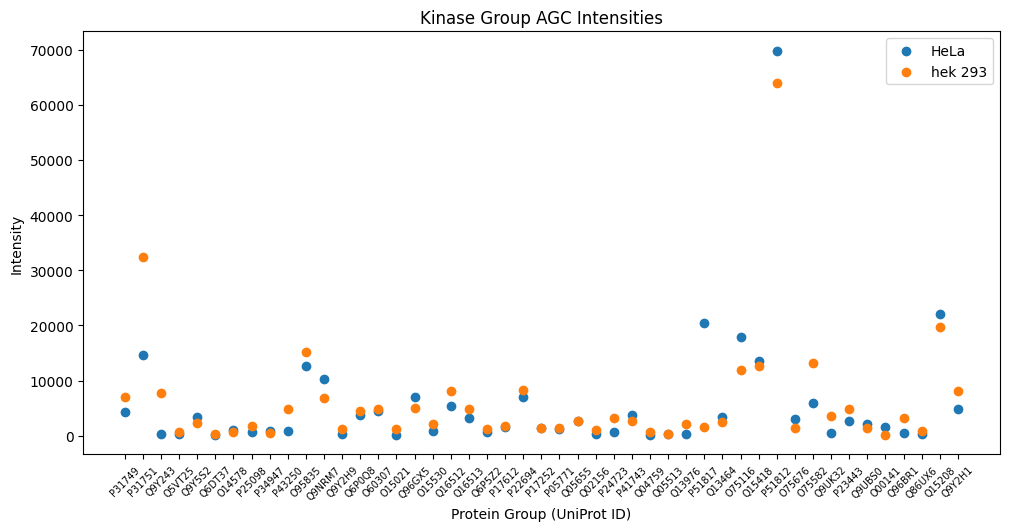

In [7]:
agc = mergedDf[mergedDf["Kinase Classification"] == "AGC"]

plt.figure(figsize=(10, 5))
# plt.plot(mergedDf['average_hela_X044_invivo'], marker='o')

plt.scatter(agc['PG.ProteinGroups'], agc['average_hela_X044_invivo'], label = "HeLa")
plt.scatter(agc['PG.ProteinGroups'], agc['average_hek293_X044_invivo'], label="hek 293")
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.xticks(fontsize=7)
plt.tight_layout()
plt.legend()
plt.title("Kinase Group AGC Intensities")
plt.ylabel("Intensity")
plt.xlabel("Protein Group (UniProt ID)")

plt.savefig("testingAGC.tiff", dpi=300, bbox_inches='tight')


In [8]:
print(mergedDf['average_hela_X044_invivo'].max())
mergedDf

285688.8125


,HGNC,Kinase Classification,PG.ProteinGroups,[4] Hek293_XO44_invivo_1.raw.PG.Quantity,[5] Hek293_XO44_invivo_2.raw.PG.Quantity,[6] Hek293_XO44_invivo_3.raw.PG.Quantity,[10] HeLa_XO44_invivo_1.raw.PG.Quantity,[11] HeLa_XO44_invivo_2.raw.PG.Quantity,[12] HeLa_XO44_invivo_3.raw.PG.Quantity,average_hek293_X044_invivo,average_hela_X044_invivo
0,AAK1,Other,Q2M2I8,868.945312,719.769104,824.146240,715.630005,716.379822,868.852051,804.286886,766.953959
1,ABL1,TK,P00519,3502.917969,2665.347900,3109.280273,2306.119141,2124.788330,3245.169922,3092.515381,2558.692464
2,ABL2,TK,P42684,7730.421875,6885.491699,7011.898438,4347.907227,4208.270508,5555.064941,7209.270671,4703.747559
3,ACVR1,TKL,Q04771,4278.835938,3536.387695,4024.496338,1401.100952,1048.935425,2135.180420,3946.573324,1528.405599
4,ACVR1B,TKL,P36896,2425.750000,2262.575195,3081.423096,498.568329,582.790466,814.860718,2589.916097,632.073171
...,...,...,...,...,...,...,...,...,...,...,...
362,FAM20B,PKL,O75063,426.221466,304.096069,505.990601,372.765717,310.553009,492.194153,412.102712,391.837626
363,FASTKD1,not in kinbase,Q53R41,535.481323,450.941864,543.104187,599.410583,578.244568,821.828918,509.842458,666.494690
364,FASTKD2,not in kinbase,Q9NYY8,2616.432617,2114.037598,2552.085693,6198.708496,6750.619629,8791.963867,2427.518636,7247.097331
365,FASTKD5,not in kinbase,Q7L8L6,2105.891113,1781.678711,2081.756836,1260.710938,1030.181152,1474.197632,1989.775553,1255.029907


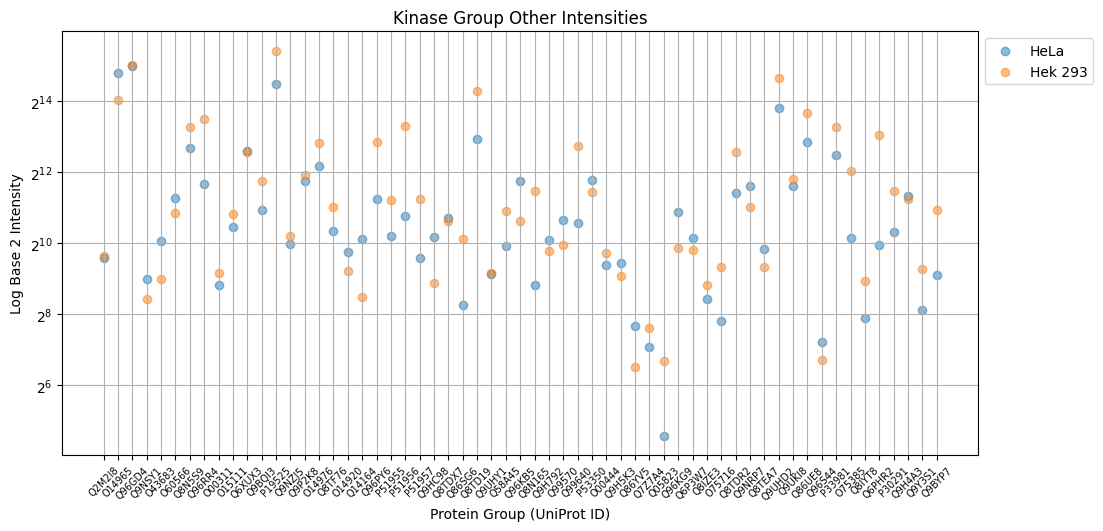

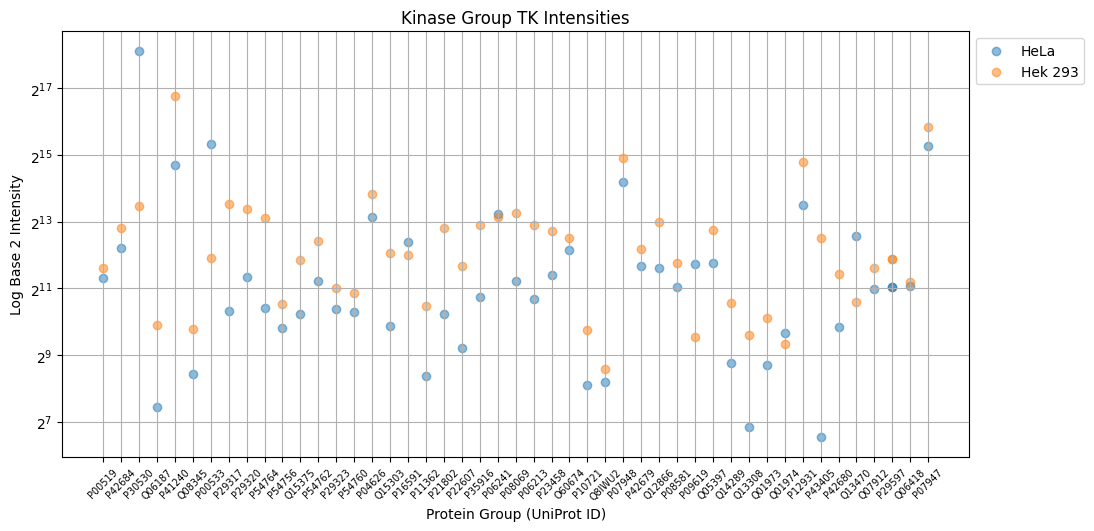

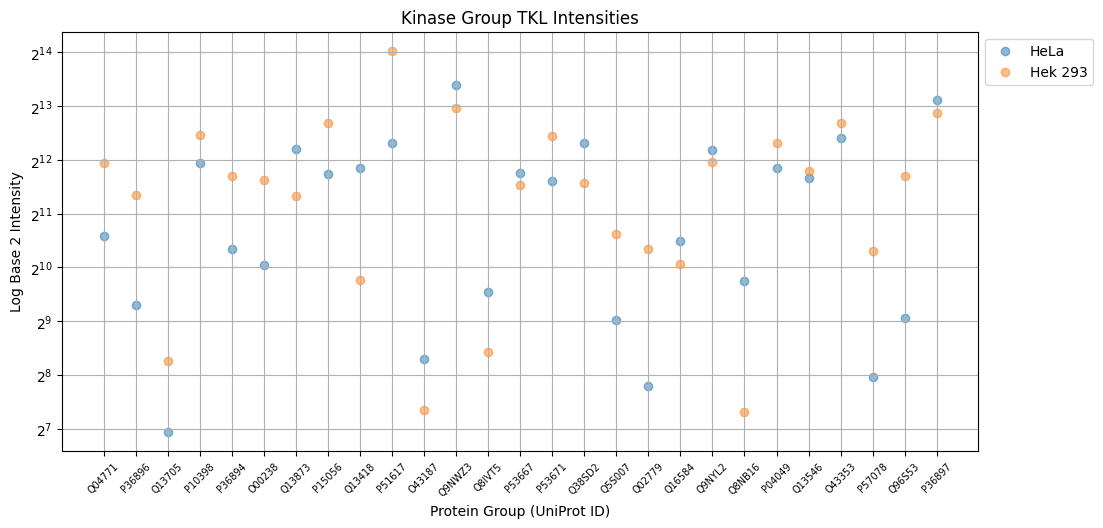

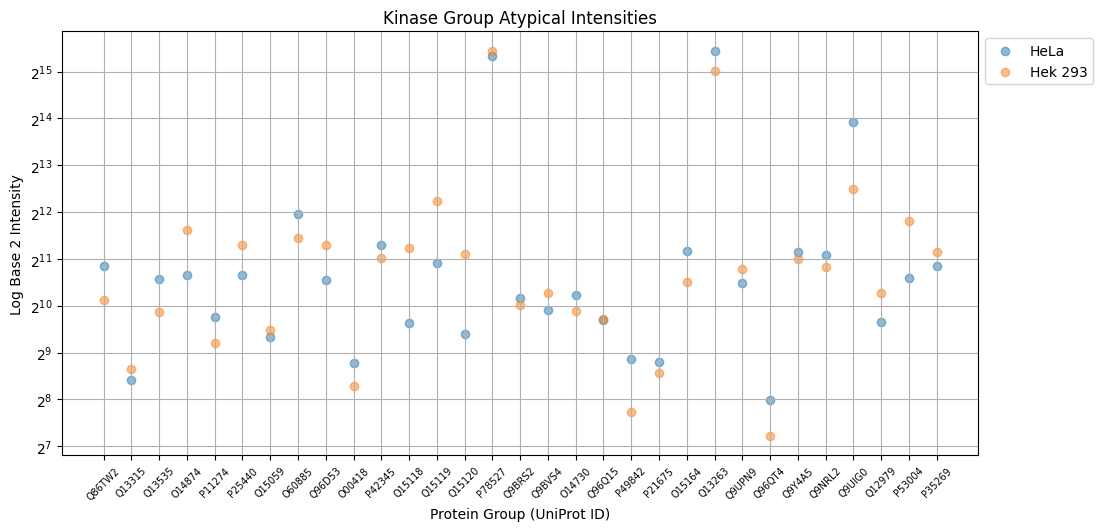

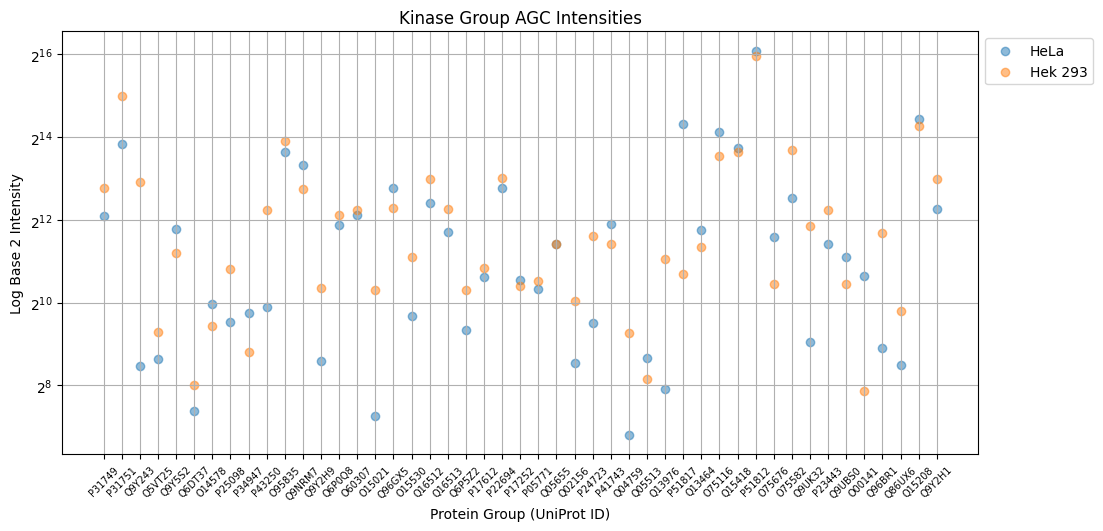

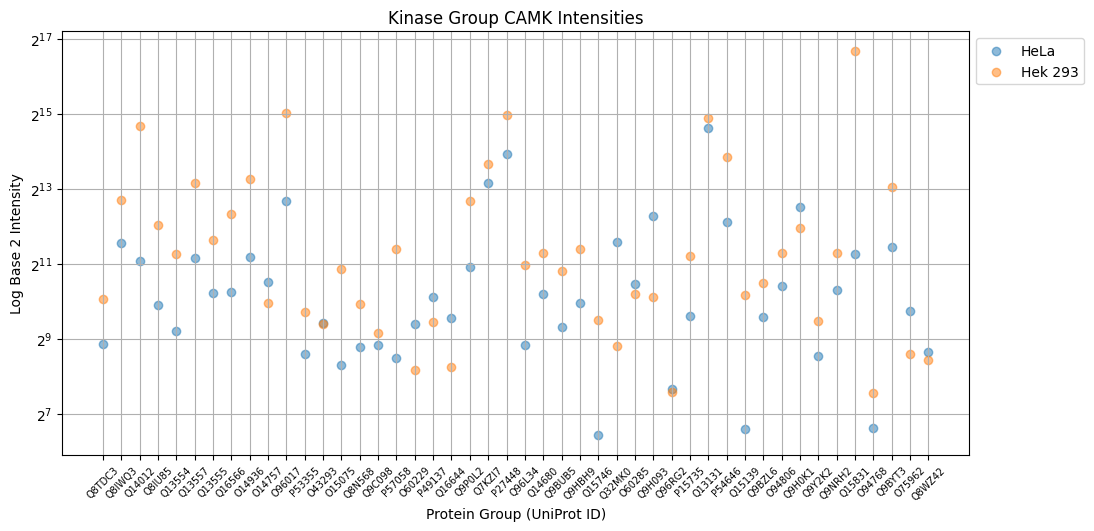

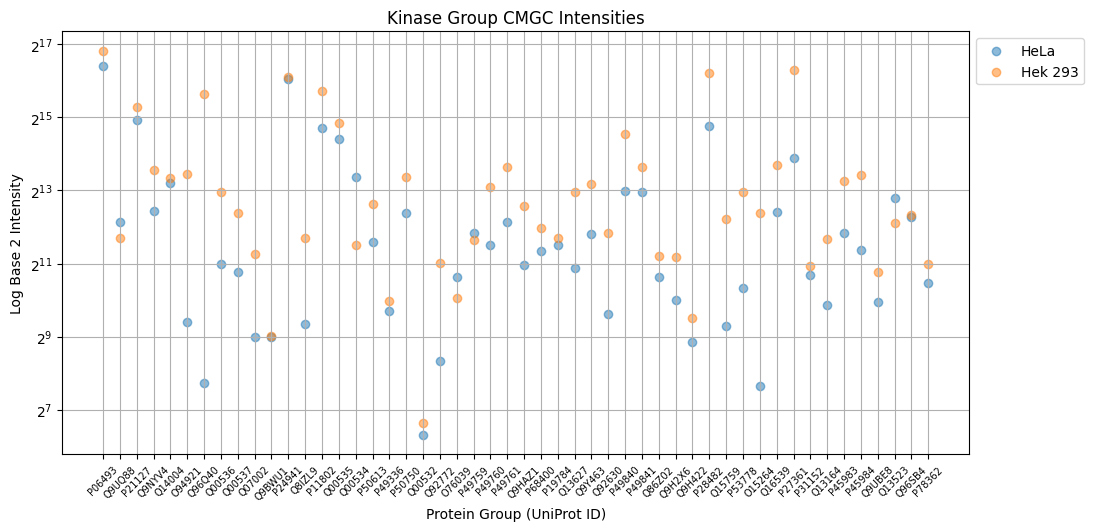

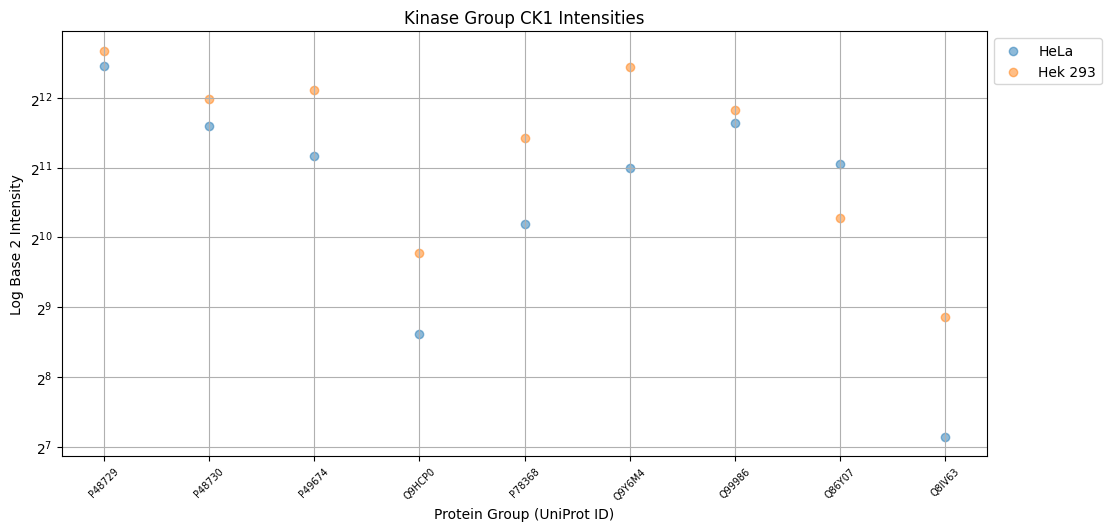

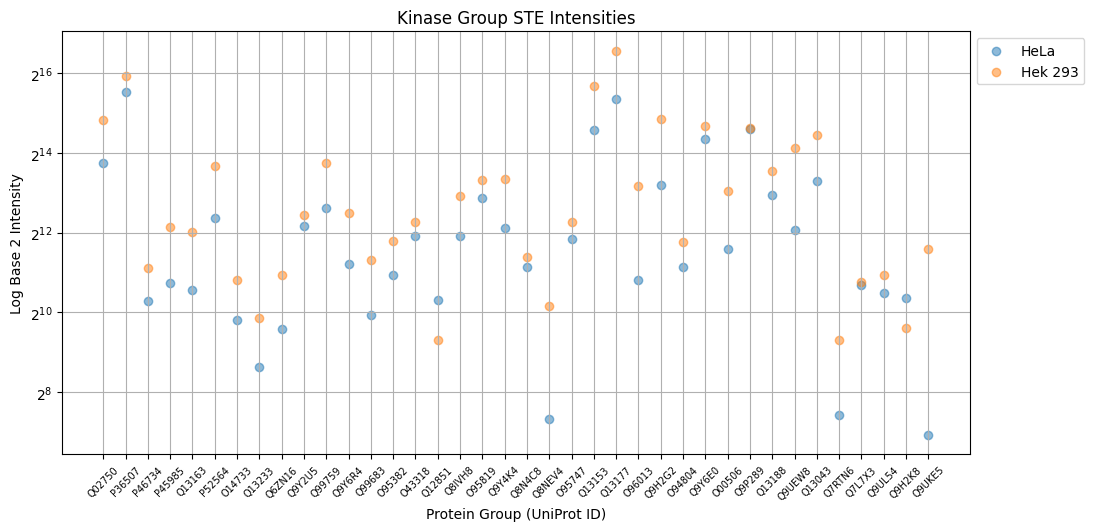

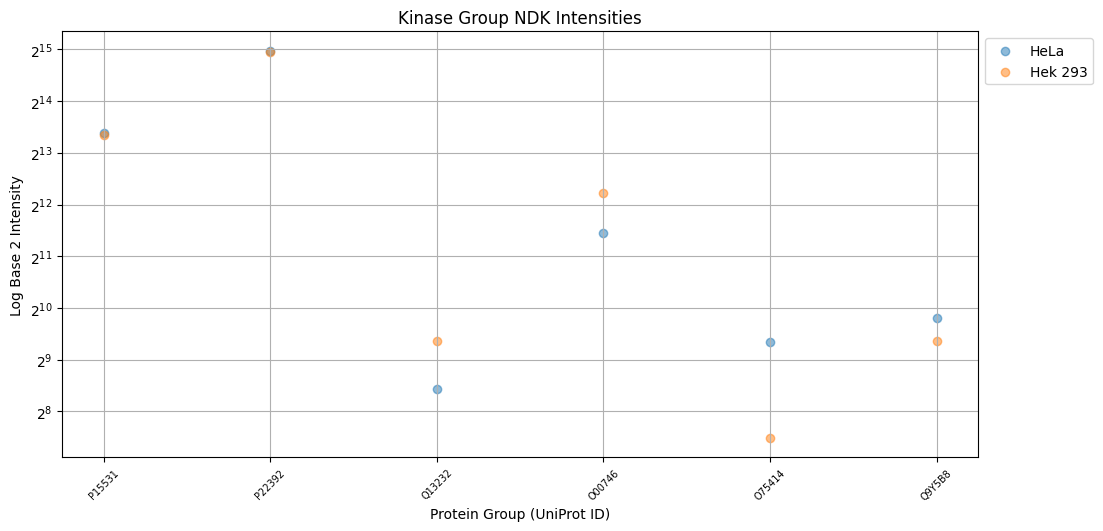

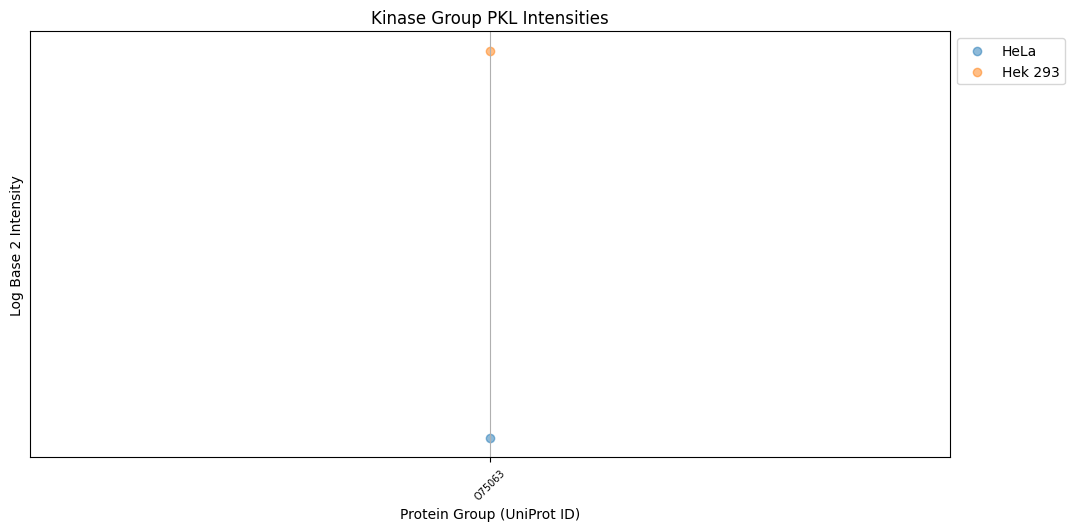

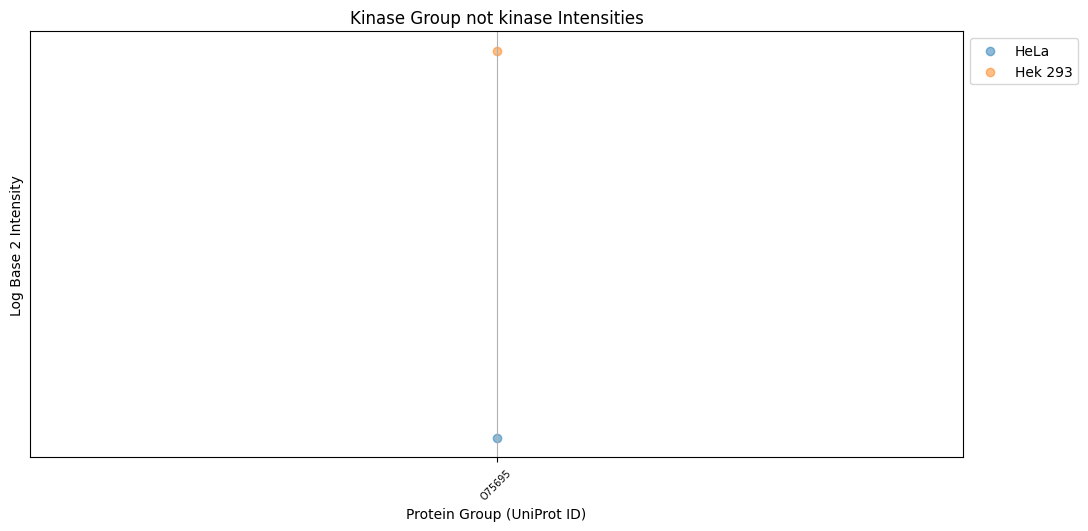

In [9]:
unique_kinases= mergedDf['Kinase Classification'].unique().tolist()
unique_kinases.remove("not in kinbase")
for kinase in unique_kinases:
    graphDf = mergedDf[mergedDf["Kinase Classification"] == kinase]
#     print(kinase)
    plt.figure(figsize=(10, 5))
    # plt.plot(mergedDf['average_hela_X044_invivo'], marker='o')
    plt.grid(True)
    plt.scatter(graphDf['PG.ProteinGroups'], graphDf['average_hela_X044_invivo'], label = "HeLa", alpha=0.5)
    plt.scatter(graphDf['PG.ProteinGroups'], graphDf['average_hek293_X044_invivo'], label="Hek 293",alpha=0.5)
    plt.xticks(rotation=45)  # Rotate labels by 45 degrees
    plt.xticks(fontsize=7)
    plt.tight_layout()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    title = "Kinase Group "+ str(kinase) +" Intensities"
    plt.title(title)
    plt.ylabel("Log Base 2 Intensity")
    plt.xlabel("Protein Group (UniProt ID)")
    plt.yscale('log', base=2)
    
#     plt.savefig(str(kinase + "_logTwo_scatterplot.tiff"), dpi=300, bbox_inches='tight')

In [10]:
mergedDf = pd.merge(kinaseDf, intensityDf, left_on="HGNC ", right_on="PG.Genes", how="inner")
mergedDf[mergedDf["Kinase Classification"] == "TK"].reset_index().to_csv("TK_DF.csv", index=False)